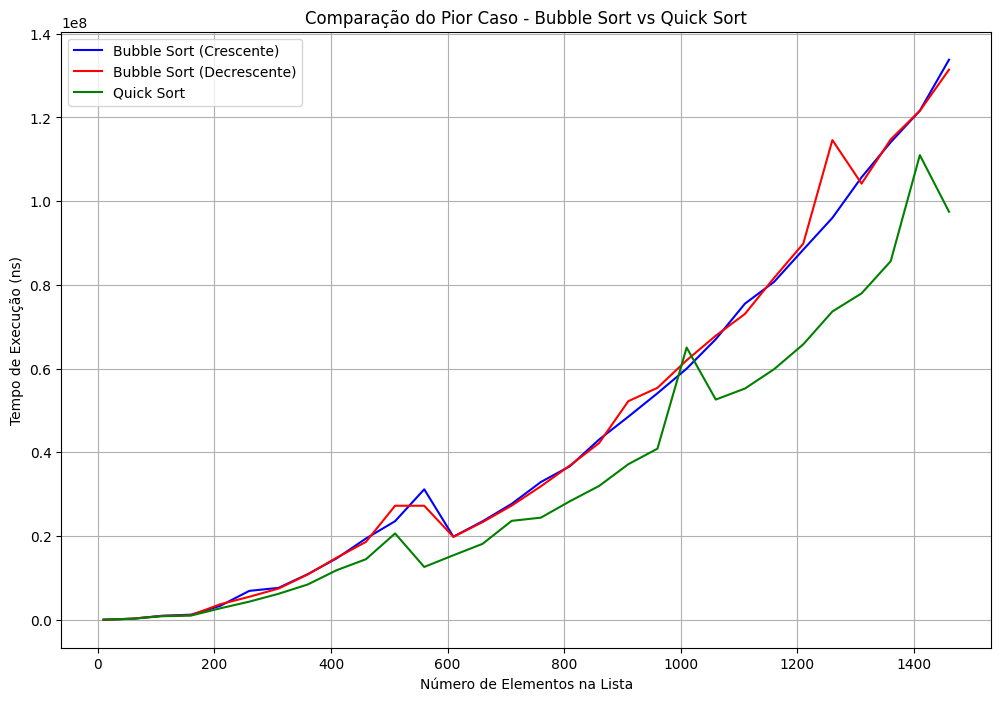

In [6]:
import time
import matplotlib.pyplot as plt
import sys

sys.setrecursionlimit(2000)

def bubble_ascendente(lista):
    n = len(lista)
    for i in range(n - 1):
        for j in range(n - 1 - i):
            if lista[j] > lista[j+1]:
                lista[j], lista[j+1] = lista[j+1], lista[j]
    return lista

def bubble_descendente(lista):
    n = len(lista)
    for i in range(n - 1):
        for j in range(n - 1 - i):
            if lista[j] < lista[j+1]:
                lista[j], lista[j+1] = lista[j+1], lista[j]
    return lista

def quicksort(lista, inicio=None, fim=None):
    if inicio is None: inicio = 0
    if fim is None: fim = len(lista) - 1
    if inicio < fim:
        pivo = particionar(lista, inicio, fim)
        quicksort(lista, inicio, pivo - 1)
        quicksort(lista, pivo + 1, fim)
    return lista

def particionar(lista, inicio, fim):
    pivo = lista[fim]
    i = inicio - 1
    for j in range(inicio, fim):
        if lista[j] <= pivo:
            i += 1
            lista[i], lista[j] = lista[j], lista[i]
    lista[i+1], lista[fim] = lista[fim], lista[i+1]
    return i + 1

def lista_crescente(tamanho):
    return list(range(tamanho))

def lista_invertida(tamanho):
    return [tamanho - i for i in range(tamanho)]

def comparar_pior(max_elementos=1500, passo=50):
    tamanhos = []
    tempos_bubble_ascendente = []
    tempos_bubble_descendente = []
    tempos_quicksort = []

    for tamanho in range(10, max_elementos, passo):
        tamanhos.append(tamanho)

        list_ascendente = lista_invertida(tamanho)
        inicio = time.time_ns()
        bubble_ascendente(list_ascendente)
        tempos_bubble_ascendente.append(time.time_ns() - inicio)

        list_descendente = lista_crescente(tamanho)
        inicio = time.time_ns()
        bubble_descendente(list_descendente)
        tempos_bubble_descendente.append(time.time_ns() - inicio)

        list_quicksort = lista_crescente(tamanho)
        inicio = time.time_ns()
        quicksort(list_quicksort)
        tempos_quicksort.append(time.time_ns() - inicio)

    plt.figure(figsize=(12, 8))
    plt.plot(tamanhos, tempos_bubble_ascendente, label='Bubble Sort (Crescente)', color='blue', marker='')
    plt.plot(tamanhos, tempos_bubble_descendente, label='Bubble Sort (Decrescente)', color='red', marker='')
    plt.plot(tamanhos, tempos_quicksort, label='Quick Sort', color='green', marker='')


    plt.xlabel('Número de Elementos na Lista')
    plt.ylabel('Tempo de Execução (ns)')
    plt.title('Comparação do Pior Caso - Bubble Sort vs Quick Sort')
    plt.legend()
    plt.grid(True)
    plt.show()

comparar_pior()
